# Project 2: MTH 281

The following project was completed by Summer Mills, Uzair Tahamid Siam, and Navya Uberoi.

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.collections import LineCollection

from scipy.fftpack import fft, ifft, fftfreq

mpl.rcParams.update({'font.size': 12})

## Question 1

In [2]:
def dydx_spectral(y, kx, n):
    # Computes the nth spectral derivative of a function y
    return ifft((1j * kx)**n * fft(y)).real

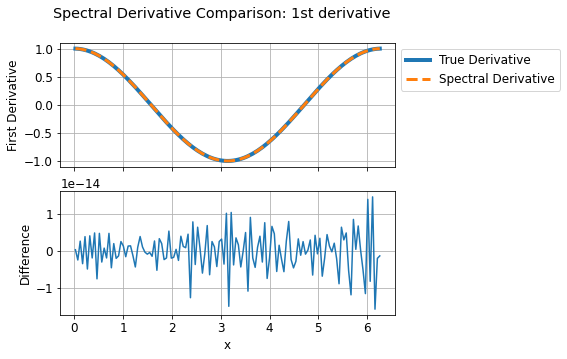

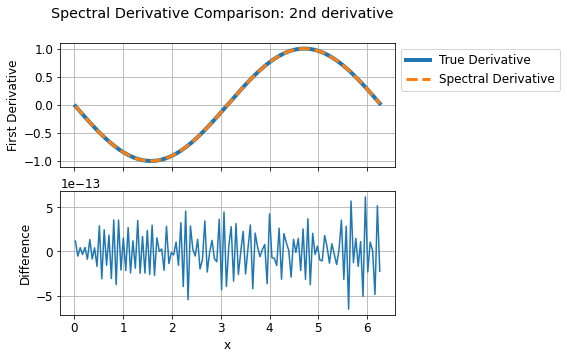

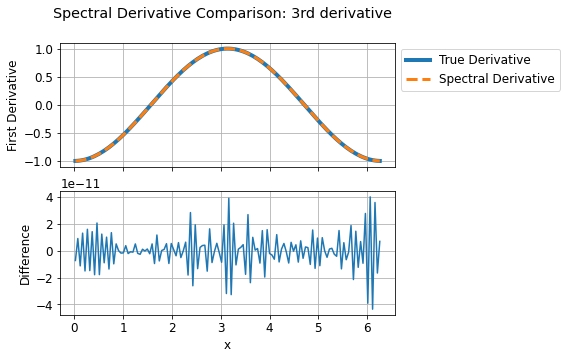

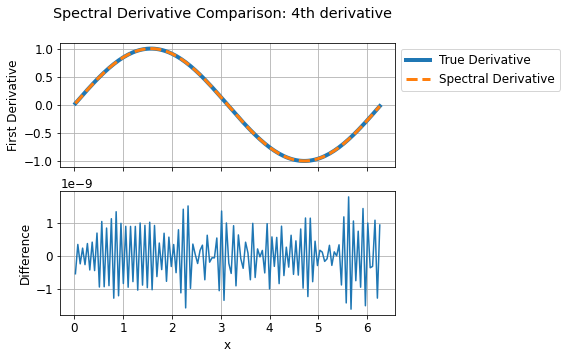

In [3]:
Nx = 128
Lx = 2 * np.pi
dx = Lx / Nx

# Set up the grid and define the funtion
x = np.arange( dx/2, Lx, dx )
y = np.sin(x)
kx = 2 * np.pi * fftfreq(Nx, d = dx)

# Define the true 1st, 2nd, 3rd, and 4th derivatives of y
dydx_True = [np.cos(x), -np.sin(x), -np.cos(x), np.sin(x)]

for n, dydx_true, ordinal in zip(range(1, 5), dydx_True, ['1st', '2nd', '3rd', '4th']):
    dydx = dydx_spectral(y, kx, n)
    
    # Create figure
    fig, axes = plt.subplots(2, 1, sharex=True, figsize = (6, 5))    
    title = fig.suptitle('Spectral Derivative Comparison: {} derivative'.format(ordinal))

    # Plot the spectral and true derivative
    axes[0].plot( x, dydx_true, linewidth = 4, label = 'True Derivative' )
    axes[0].plot( x, dydx, '--', linewidth = 3, label = 'Spectral Derivative' )

    # Plot the error between the spectral and true derivative
    axes[1].plot( x, dydx_true - dydx )

    xlabel = axes[1].set_xlabel('x')
    ylabel0 = axes[0].set_ylabel('First Derivative')
    ylabel1 = axes[1].set_ylabel('Difference')

    lgd = axes[0].legend(loc = 'upper left', bbox_to_anchor = (1,0,0.15,1))
    
    for ax in axes:
        ax.grid()
        
#     fig.savefig('project2_question1_comparison_{}derivative.png'.format(ordinal), bbox_extra_artists=(lgd, title, ylabel0, ylabel1, xlabel), bbox_inches='tight')

In [4]:
def finite_difference(NModes):
    Lx = 2 * np.pi
    Nxs = np.power(2, np.arange(2, 9))
    
    # Create arrays to store the error values
    err_2 = np.zeros(Nxs.shape)
    err_4 = np.zeros(Nxs.shape)
    
    s_err_1 = np.zeros(Nxs.shape)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize = (11, 4))
    
    for ind, Nx in enumerate(Nxs):
        
        # Create grid
        dx = Lx / Nx
        x = np.linspace(0, Lx, Nx + 1)[:-1]
        
        kx = 2 * np.pi * fftfreq(Nx, d = dx)
        
        # Function to differentiate
        y = np.sin(NModes * x)
        
        # True derivatives
        dydx1_true = NModes * np.cos(NModes * x)
        
        # Compute the numerical derivatives
        Ord2 = (                      np.roll(y, -1) -   np.roll(y, 1)                 ) / ( 2*dx)
        Ord4 = ( - np.roll(y, -2) + 8*np.roll(y, -1) - 8*np.roll(y, 1) + np.roll(y, 2) ) / (12*dx)
        
        # Compute the spectral derivatives
        dydx1_spectral = ifft((1j * kx) * fft(y)).real
        
        # Store the error in the numerical derivatives
        err_2[ind] = np.sqrt(np.mean((Ord2 - dydx1_true)**2))
        err_4[ind] = np.sqrt(np.mean((Ord4 - dydx1_true)**2))
        
        # Store the error in the spectral derivatives
        s_err_1[ind] = np.sqrt(np.mean((dydx1_spectral - dydx1_true)**2))
        
    # Plot the numerical errors
    ax.plot(Lx/Nxs, err_2, '-o', label='2nd order (numerical)')
    ax.plot(Lx/Nxs, err_4, '-o', label='4th order (numerical)')
    
    ax.plot(Lx/Nxs, (Lx/Nxs)**2, '--k', label='$dx^2$')
    ax.plot(Lx/Nxs, (Lx/Nxs)**4, '-.k', label='$dx^4$')
    
    # Plot the spectral errors
    ax.plot(Lx/Nxs, s_err_1, '-o', label='1st order (spectral)')
    
    lgd = ax.legend(bbox_to_anchor=(1., 0, 0.25, 1))
    x = ax.set_xlabel('$\Delta x$')
    y = ax.set_ylabel('Finite Difference Error')
    title = ax.set_title('Demonstration of Convergende Order: NModes = {}'.format(NModes))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid()
    
    fig.tight_layout()
#     fig.savefig('project2_question1_nmodes={}.png'.format(NModes), bbox_extra_artists=(lgd, title, y, x), bbox_inches='tight')
    return fig, ax
   

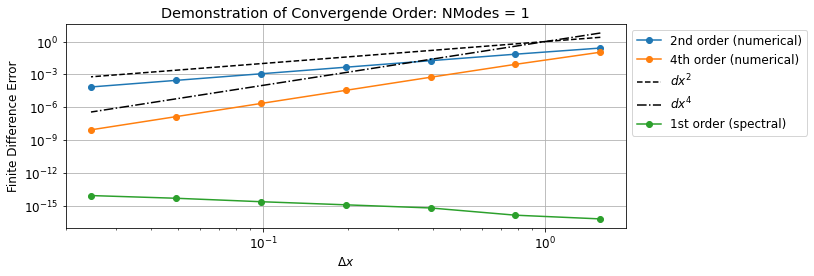

In [5]:
fig, ax = finite_difference(1)

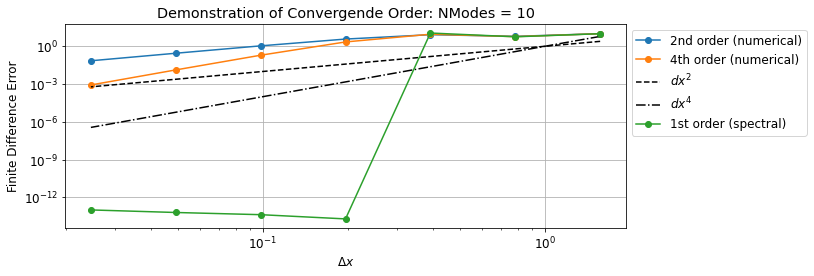

In [6]:
fig, ax = finite_difference(10)

## Question 2

In [7]:
Nx = 512
Lx = 32
dx = Lx / Nx

x = np.arange( dx/2, Lx, dx ) - Lx / 2

kx = 2 * np.pi * fftfreq(Nx, d = dx)

In [8]:
y1 = np.exp(-x**2)
y1_hat = fft(y1)

y2 = np.tanh(5 - np.abs(x))
y2_hat = fft(y2)

y3 = np.cos(np.pi * (x/2)**2)
y3_hat = fft(y3)

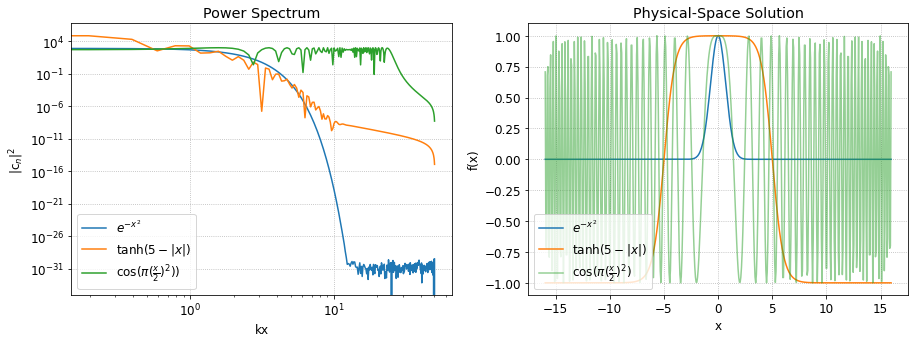

In [9]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize = (15, 5))

#Spectral plots

axes[0].plot( kx[:Nx//2], np.abs(y1_hat[:Nx//2])**2, label = r'$e^{-x^2}$')
axes[0].plot( kx[:Nx//2], np.abs(y2_hat[:Nx//2])**2, label = r'$\tanh(5-|x|)$')
axes[0].plot( kx[:Nx//2], np.abs(y3_hat[:Nx//2])**2, label = r'$\cos(\pi(\frac{x}{2})^2))$')
axes[0].set(xscale = 'log')
axes[0].set(yscale = 'log')
axes[0].set_title("Power Spectrum")
axes[0].set_xlabel("kx")
axes[0].set_ylabel(r"|c$_n$|$^2$")
axes[0].legend()

#Spacial plots

axes[1].plot(x, y1, label = r'$e^{-x^2}$')
axes[1].plot(x, y2, label = r'$\tanh(5-|x|)$')
axes[1].plot(x, y3, label = r'$\cos(\pi(\frac{x}{2})^2)$', alpha = 0.5)
axes[1].set_title("Physical-Space Solution")
axes[1].set_xlabel("x")
axes[1].set_ylabel('f(x)')
axes[1].legend(loc='lower left')

for ax in axes:
    ax.grid(ls = ':')
    
# fig.savefig('project2_question2_spectral_and_physSpace_plot.png')

## Question 3

In [10]:
# First, we need to load in the data
heat_data = np.load('heat.npz')

time = heat_data['time']         # The temporal grid
x    = heat_data['x']            # The spatial grid
u    = heat_data['u']            # The solution (first axis is time, second is space)
kx   = heat_data['kx']           # The wavenumbers relevant to the grid
nu   = float(heat_data['nu'])    # The viscosity coefficient

Nt, Nx = u.shape

print('The data has {0:d} time points and {1:d} space points.'.format(Nt, Nx))
print('The viscous coefficient nu is {0:g}'.format(nu))

The data has 400 time points and 512 space points.
The viscous coefficient nu is 1


### Part (a)

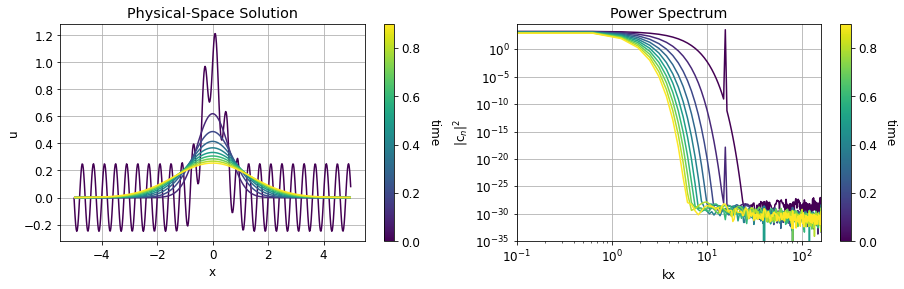

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (15,4))

ax1, ax2 = axes.flatten()
plot_inds = np.arange(0, len(time), 40)

# Select out the data that we want to use for creating lines
u_lines1 = [np.column_stack([x, u[ii,:]]) for ii in plot_inds]
u_lines2 = [np.column_stack([kx[:Nx//2], np.abs(fft(u[ii,:])[:Nx//2])**2]) for ii in plot_inds]

# Create a LineCollection object which holds them together
u_segments1 = LineCollection(u_lines1, cmap = mpl.cm.viridis)
u_segments2 = LineCollection(u_lines2, cmap = mpl.cm.viridis)  

 # Set which variable is used with the colour map (determines colours)
u_segments1.set_array(time[plot_inds])
u_segments2.set_array(time[plot_inds])

# Plot the lines         
ax1.add_collection(u_segments1)
ax2.add_collection(u_segments2)

# Need to manually update the bounds
ax1.axis('tight')
ax2.set(xlim = (.1, np.max(kx[:Nx//2])),
        ylim = (1e-35, 5*1e4))

# Add a colour bar showing time
cbar1 = plt.colorbar(u_segments1, ax = ax1)
cbar2 = plt.colorbar(u_segments2, ax = ax2)
cbar1.ax.set_ylabel('time', rotation = -90, labelpad = 20)
cbar2.ax.set_ylabel('time', rotation = -90, labelpad = 20)

xlabel1 = ax1.set_xlabel('x')
ax1.set_ylabel('u')
ax1.set_title('Physical-Space Solution')
xlabel2 = ax2.set_xlabel('kx')
ax2.set_ylabel(r'|c$_n$|$^2$')
ax2.set_title('Power Spectrum')
ax2.set(yscale = 'log', xscale = 'log')
# ax2.set_xlim(0, 20)

ax1.grid()
ax2.grid()

# fig.savefig('project2_question3a.png', bbox_extra_artists=(xlabel1, xlabel2), bbox_inches='tight')

The left side of the above plot is plotted again, to be used in Question 4(c).

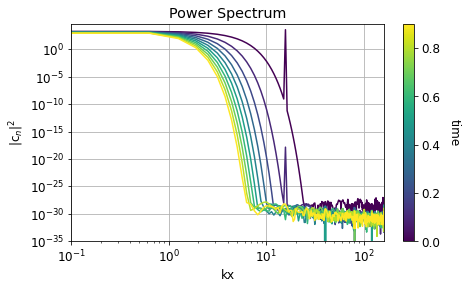

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (7,4))

plot_inds = np.arange(0, len(time), 40)

# Select out the data that we want to use for creating lines
u_lines = [np.column_stack([kx[:Nx//2], np.abs(fft(u[ii,:])[:Nx//2])**2]) for ii in plot_inds]

# Create a LineCollection object which holds them together
u_segments = LineCollection(u_lines2, cmap = mpl.cm.viridis)  

 # Set which variable is used with the colour map (determines colours)
u_segments.set_array(time[plot_inds])

# Plot the lines         
ax.add_collection(u_segments)

# Need to manually update the bounds
ax.set(xlim = (.1, np.max(kx[:Nx//2])),
        ylim = (1e-35, 5*1e4))

# Add a colour bar showing time
cbar = plt.colorbar(u_segments, ax = ax)
cbar.ax.set_ylabel('time', rotation = -90, labelpad = 20)

xlabel = ax.set_xlabel('kx')
ylabel = ax.set_ylabel(r'|c$_n$|$^2$')
title = ax.set_title('Power Spectrum')
ax.set(yscale = 'log', xscale = 'log')

ax.grid()
# fig.savefig('project2_question4c_q3.png', bbox_extra_artists=(xlabel, ylabel, title), bbox_inches='tight')

### Part(b)

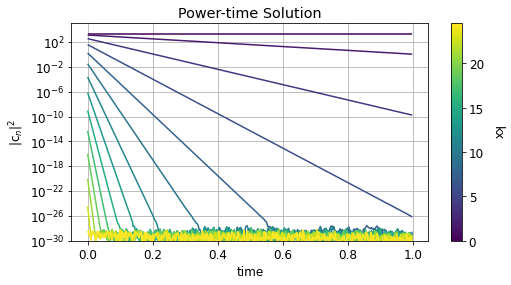

In [13]:
u_hat = fft(u)
fig, ax = plt.subplots(1, 1, figsize = (8, 4))

plot_inds = np.arange(0, 40,3)

# Select out the data that we want to use for creating lines
u_lines = [np.column_stack([time, np.abs(u_hat[:,ii])**2]) for ii in plot_inds]

# Create a LineCollection object which holds them together
u_segments = LineCollection(u_lines, cmap = mpl.cm.viridis) 

 # Set which variable is used with the colour map (determines colours)
u_segments.set_array(kx[plot_inds])

# Plot the lines         
ax.add_collection(u_segments)

# Need to manually update the bounds
ax.axis('tight')
#ax.set(xlim = (.1, np.max(time))
     #          ,ylim = (1e-35, 5*1e4))
      
# Add a colour bar showing time
cbar = plt.colorbar(u_segments, ax=ax)
cbar.ax.set_ylabel('kx', rotation = -90, labelpad = 20)

xlabel = ax.set_xlabel('time')
ax.set_ylabel(r'|c$_n$|$^2$')
ax.set_title('Power-time Solution')
ax.set(yscale = 'log')
    #, xscale = 'log')
ax.set_ylim(1e-30,1e5)
ax.grid()


# fig.savefig('project2_question3b.png')#, bbox_extra_artists=(xlabel1, xlabel2), bbox_inches='tight')

## Question 4

In [14]:
# First, we need to load in the data
Burgers_data = np.load('Burgers.npz')

time = Burgers_data['time']         # The temporal grid
x    = Burgers_data['x']            # The spatial grid
u    = Burgers_data['u']            # The solution (first axis is time, second is space)
kx   = Burgers_data['kx']           # The wavenumbers relevant to the grid
nu   = float(Burgers_data['nu'])    # The viscosity coefficient

Nt, Nx = u.shape

print('The data has {0:d} time points and {1:d} space points.'.format(Nt, Nx))
print('The viscous coefficient nu is {0:g}'.format(nu))

The data has 400 time points and 512 space points.
The viscous coefficient nu is 0.00078125


### Part (a)

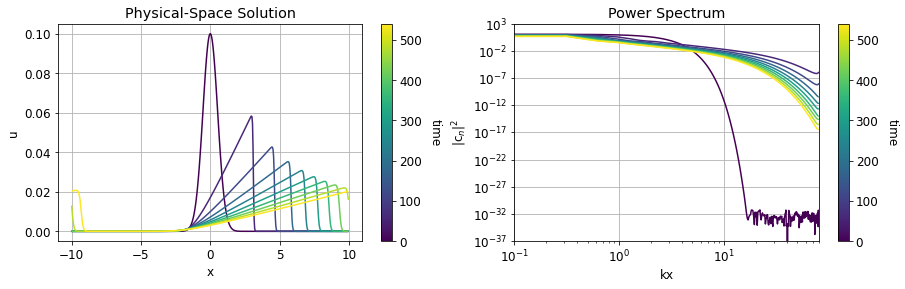

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15,4))

ax1, ax2 = axes.flatten()
plot_inds = np.arange(0, len(time), 40)

# Select out the data that we want to use for creating lines
u_lines1 = [np.column_stack([x, u[ii,:]]) for ii in plot_inds]
u_lines2 = [np.column_stack([kx[:Nx//2], np.abs(fft(u[ii,:])[:Nx//2])**2]) for ii in plot_inds]

# Create a LineCollection object which holds them together
u_segments1 = LineCollection(u_lines1, cmap = mpl.cm.viridis)
u_segments2 = LineCollection(u_lines2, cmap = mpl.cm.viridis)  

 # Set which variable is used with the colour map (determines colours)
u_segments1.set_array(time[plot_inds])
u_segments2.set_array(time[plot_inds])

# Plot the lines         
ax1.add_collection(u_segments1)
ax2.add_collection(u_segments2)

# Need to manually update the bounds
ax1.axis('tight')
ax2.set(xlim = (0.1, np.max(kx[:Nx//2])),
        ylim = (1e-37, 1e3))

# Add a colour bar showing time
cbar1 = plt.colorbar(u_segments1, ax = ax1)
cbar2 = plt.colorbar(u_segments2, ax = ax2)
cbar1.ax.set_ylabel('time', rotation = -90, labelpad = 20)
cbar2.ax.set_ylabel('time', rotation = -90, labelpad = 20)

xlabel1 = ax1.set_xlabel('x')
ax1.set_ylabel('u')
ax1.set_title('Physical-Space Solution')
xlabel2 = ax2.set_xlabel('kx')
ax2.set_ylabel(r'|c$_n$|$^2$')
ax2.set_title('Power Spectrum')
ax2.set(yscale = 'log', xscale = 'log')

ax1.grid()
ax2.grid()

# fig.savefig('project2_question4a.png', bbox_extra_artists=(xlabel1, xlabel2), bbox_inches='tight')

The left side of the above plot is plotted again, to be used in Question 4(c).

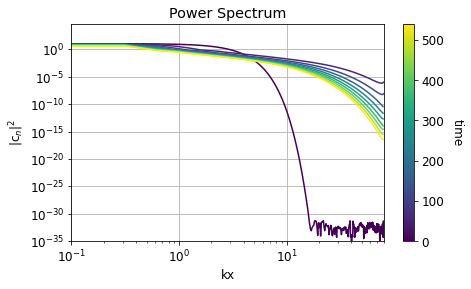

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (7,4))

plot_inds = np.arange(0, len(time), 40)

# Select out the data that we want to use for creating lines
u_lines = [np.column_stack([kx[:Nx//2], np.abs(fft(u[ii,:])[:Nx//2])**2]) for ii in plot_inds]

# Create a LineCollection object which holds them together
u_segments = LineCollection(u_lines2, cmap = mpl.cm.viridis)  

 # Set which variable is used with the colour map (determines colours)
u_segments.set_array(time[plot_inds])

# Plot the lines         
ax.add_collection(u_segments)

# Need to manually update the bounds
ax.set(xlim = (.1, np.max(kx[:Nx//2])),
        ylim = (1e-35, 5*1e4))

# Add a colour bar showing time
cbar = plt.colorbar(u_segments, ax = ax)
cbar.ax.set_ylabel('time', rotation = -90, labelpad = 20)

xlabel = ax.set_xlabel('kx')
ylabel = ax.set_ylabel(r'|c$_n$|$^2$')
title = ax.set_title('Power Spectrum')
ax.set(yscale = 'log', xscale = 'log')

ax.grid()
# fig.savefig('project2_question4c_q4.png', bbox_extra_artists=(xlabel, ylabel, title), bbox_inches='tight')